# Linear Regression

In [1]:
import pandas as pd
data = pd.read_csv('BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
data.shape

(506, 14)

In [3]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
data_ = data.loc[:,['lstat','medv']]
data_.head()

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


# Visualizing variables:

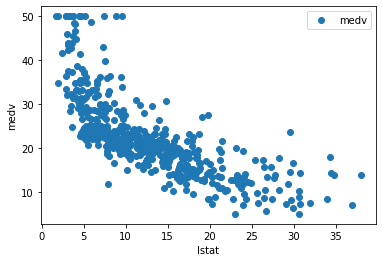

In [5]:
import matplotlib.pyplot as plt

data.plot(x='lstat',y='medv',style='o')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

# Preparing Data:

In [6]:
x = pd.DataFrame(data['lstat'])
y = pd.DataFrame(data['medv'])
x.size,y.size

(506, 506)

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [11]:
print(regressor.intercept_)
print(regressor.coef_)

[34.33497839]
[[-0.92441715]]


In [12]:
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred,columns=['predicted'])

In [13]:
y_pred

,predicted
0,27.374117
1,27.697663
2,16.955936
3,26.847199
4,24.915168
...,...
97,26.791734
98,30.507891
99,22.317555
100,19.830873


y_test

In [14]:
from sklearn import metrics
import numpy as np

In [15]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 5.078127727696937
Mean Squared Error: 46.994820919547124
Root Mean Squared Error: 6.855276866731724


# Multiple Linear Regression

In [16]:
dataset=pd.read_csv('BostonHousing.csv')
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [17]:
X = pd.DataFrame(dataset.iloc[:,:-1])
Y = pd.DataFrame(dataset.iloc[:,-1])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.20)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [23]:
v = pd.DataFrame(regressor.coef_,index=['Co-efficient']).transpose()
w = pd.DataFrame(X.columns, columns = ['Attribute'])

In [24]:
v

,Co-efficient
0,-0.079057
1,0.048639
2,0.061017
3,3.743642
4,-18.030412
5,3.999949
6,-0.003398
7,-1.508610
8,0.249042
9,-0.010365


In [25]:
w

,Attribute
0,crim
1,zn
2,indus
3,chas
4,nox
5,rm
6,age
7,dis
8,rad
9,tax


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [36]:
df = pd.read_csv('homeprices.csv')

In [37]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


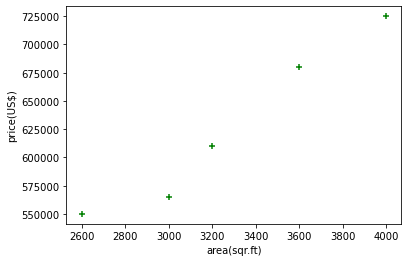

In [38]:
plt.xlabel('area(sqr.ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price, color='green',marker='+')

In [46]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [47]:
reg.coef_

array([135.78767123])

In [48]:
reg.intercept_

180616.43835616432

In [51]:
reg.predict([[3200]])

array([615136.98630137])

In [52]:
d = pd.read_csv('areas.csv')
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [53]:
p = reg.predict(d)

In [54]:
d['prices'] = p

In [58]:
d.to_csv("prediction.csv",index=False)

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


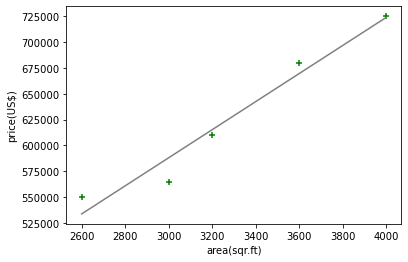

In [60]:
plt.xlabel('area(sqr.ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price, color='green',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='grey')

# Canada per capita income prediction 

In [73]:
df = pd.read_csv('canada_per_capita_income.csv')

In [74]:
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


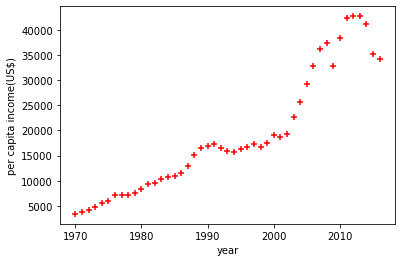

In [75]:
plt.xlabel('year')
plt.ylabel('per capita income(US$)')
plt.scatter(df.year,df.income, color='red',marker='+')

In [76]:
reg = linear_model.LinearRegression()
reg.fit(df[['year']],df.income)

LinearRegression()

In [77]:
reg.coef_

array([828.46507522])

In [78]:
reg.intercept_

-1632210.7578554575

In [79]:
reg.predict([[2020]])

array([41288.69409442])

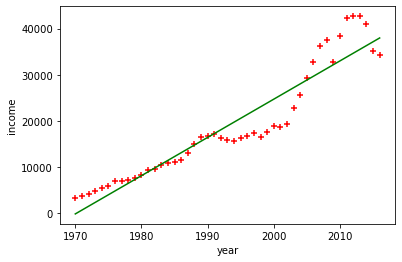

In [81]:
plt.xlabel('year')
plt.ylabel('income')
plt.scatter(df.year,df.income, color='red',marker='+')
plt.plot(df.year,reg.predict(df[['year']]),color='green')

# Salary prediction (Multiple Linear regression)

In [5]:
df = pd.read_csv('hiring.csv')

In [6]:
df

,experience,TestScore,InterviewScore,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [9]:
import math
median_testscore = df.TestScore.median()

In [11]:
df.TestScore = df.TestScore.fillna(median_testscore)
df

,experience,TestScore,InterviewScore,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [12]:
from word2number import w2n

In [17]:
df.experience = df.experience.fillna("zero")
df

,experience,TestScore,InterviewScore,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [18]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,TestScore,InterviewScore,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [19]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','TestScore','InterviewScore']],df.salary)

LinearRegression()

In [20]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [21]:
reg.intercept_

17737.263464337695

**Finding salary for 2 year experience, 9 test score, 6 interview score**

In [22]:
reg.predict([[2,9,6]])

array([53205.96797671])

**Finding salary for 12 year experience, 10 test score, 10 interview score**

In [23]:
reg.predict([[12,10,10]])

array([92002.18340611])